<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Module%203/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# Data Analysis with Python

Estimated time needed: **30** minutes

## Objectives

After completing this lab you will be able to:

*   Explore features or charecteristics to predict price of ETH


<h2>Table of Contents</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol>
    <li><a href="https://#import_data">Import Data from Module</a></li>
    <li><a href="https://#pattern_visualization">Analyzing Individual Feature Patterns using Visualization</a></li>
    <li><a href="https://#discriptive_statistics">Descriptive Statistical Analysis</a></li>
    <li><a href="https://#basic_grouping">Basics of Grouping</a></li>
    <li><a href="https://#correlation_causation">Correlation and Causation</a></li>
    <li><a href="https://#anova">ANOVA</a></li>
</ol>

</div>

<hr>


<h3>What are the main characteristics that have the most impact on the BTC price?</h3>


<h2 id="import_data">1. Import Data from Module 2</h2>


<h4>Setup</h4>


you are running the lab in your  browser, so we will install the libraries using `piplite`


In [1]:
#you are running the lab in your  browser, so we will install the libraries using ``piplite``
import piplite
await piplite.install(['pandas'])
await piplite.install(['matplotlib'])
await piplite.install(['scipy'])
await piplite.install(['seaborn'])
await piplite.install(['mplfinance'])
await piplite.install(['plotly'])

Import libraries:


If you run the lab locally using Anaconda, you can load the correct library and versions by uncommenting the following:


In [2]:
#If you run the lab locally using Anaconda, you can load the correct library and versions by uncommenting the following:
#install specific version of libraries used in lab
#! mamba install pandas==1.3.3
#! mamba install numpy=1.21.2
#! mamba install scipy=1.7.1-y
#!  mamba install seaborn=0.9.0-y

In [3]:
import pandas as pd
import numpy as np

This function will download the dataset into your browser


In [4]:
#This function will download the dataset into your browser 

from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())


Load the data and store it in dataframe `df`:


This dataset was hosted on IBM Cloud object. Click <a href="https://cocl.us/DA101EN_object_storage?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01">HERE</a> for free storage.


In [5]:
#set path host where will be all our datasets 
path_host='https://1824251045.rsc.cdn77.org/web/algohouse/data'

you will need to download the dataset; if you are running locally, please comment out the following


\#you will need to download the dataset; if you are running locally, please comment out the following
await download(path, "auto.csv")
path="auto.csv"


In [6]:
files = ["APEBUSD_trades_1m.csv","BTCBUSD_trades_1m.csv","ETHBUSD_trades_1m.csv","BNBBUSD_trades_1m.csv","XRPBUSD_trades_1m.csv",
         "DOGEBUSD_trades_1m.csv","ADABUSD_trades_1m.csv","MATICBUSD_trades_1m.csv"]
for file in files:
         await download(f'{path_host}/{file}', file)

Set headers for our main crypto:
    

In [7]:
headers = ["time","BNBBUSD_open","BNBBUSD_high","BNBBUSD_low","BNBBUSD_close","BNBBUSD_volume","BNBBUSD_rec_count","BNBBUSD_avg_price"]

In [8]:
# read our csv
df_bnb = pd.read_csv("BNBBUSD_trades_1m.csv", index_col=0, low_memory=False)
df_bnb.columns = headers
df_bnb.head()

,time,BNBBUSD_open,BNBBUSD_high,BNBBUSD_low,BNBBUSD_close,BNBBUSD_volume,BNBBUSD_rec_count,BNBBUSD_avg_price
0,2022-11-11 14:38:00,284.08,284.08,282.31,282.31,2047.23,62,283.244612
1,2022-11-11 14:39:00,282.22,282.42,281.61,281.73,791.29,67,282.077591
2,2022-11-11 14:40:00,281.73,282.33,281.23,281.71,734.08,60,281.679925
3,2022-11-11 14:41:00,281.45,281.61,280.73,281.59,1855.34,66,281.223183
4,2022-11-11 14:42:00,281.72,282.25,281.38,281.38,2878.22,61,281.912312


Now we will combine datasets with main:

In [9]:
# combine datasets
df = df_bnb
for file in files:
    if file != "BNBBUSD_trades_1m.csv":
        temp =  pd.read_csv(file, index_col=0, low_memory=False)
        curr = file.split("_")[0]
        temp = temp.add_prefix(f"{curr}_")
        df = df.merge(temp, left_on='time',right_on=f'{curr}_ts')
        df.drop(columns=f'{curr}_ts', inplace=True)
df.head()

,time,BNBBUSD_open,BNBBUSD_high,BNBBUSD_low,BNBBUSD_close,BNBBUSD_volume,BNBBUSD_rec_count,BNBBUSD_avg_price,APEBUSD_open,APEBUSD_high,...,ADABUSD_volume,ADABUSD_rec_count,ADABUSD_avg_price,MATICBUSD_open,MATICBUSD_high,MATICBUSD_low,MATICBUSD_close,MATICBUSD_volume,MATICBUSD_rec_count,MATICBUSD_avg_price
0,2022-11-11 14:38:00,284.08,284.08,282.31,282.31,2047.23,62,283.244612,3.096,3.096,...,139808.0,44,0.344496,0.9969,0.9969,0.9903,0.9905,220208.0,77,0.993500
1,2022-11-11 14:39:00,282.22,282.42,281.61,281.73,791.29,67,282.077591,3.073,3.077,...,80960.0,41,0.343841,0.9907,0.9927,0.9884,0.9884,101645.0,68,0.990534
2,2022-11-11 14:40:00,281.73,282.33,281.23,281.71,734.08,60,281.679925,3.068,3.075,...,149624.0,42,0.343694,0.9881,0.9909,0.9875,0.9893,124742.0,64,0.989423
3,2022-11-11 14:41:00,281.45,281.61,280.73,281.59,1855.34,66,281.223183,3.075,3.091,...,165967.0,47,0.343953,0.9891,0.9949,0.9883,0.9932,165038.0,69,0.991930
4,2022-11-11 14:42:00,281.72,282.25,281.38,281.38,2878.22,61,281.912312,3.085,3.093,...,34815.0,27,0.344382,0.9942,0.9950,0.9899,0.9899,159318.0,66,0.993091


<h2 id="pattern_visualization">2. Analyzing Individual Feature Patterns Using Visualization</h2>


To install Seaborn we use pip, the Python package manager.


Import visualization packages "Matplotlib" and "Seaborn". Don't forget about "%matplotlib inline" to plot in a Jupyter notebook.


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

<h4>How to choose the right visualization method?</h4>
<p>When visualizing individual variables, it is important to first understand what type of variable you are dealing with. This will help us find the right visualization method for that variable.</p>


In [11]:
#set correct types
df[["time"]] = df[["time"]].astype("datetime64")

In [12]:
# list the data types for each column
print(df.dtypes)

time                   datetime64[ns]
BNBBUSD_open                  float64
BNBBUSD_high                  float64
BNBBUSD_low                   float64
BNBBUSD_close                 float64
BNBBUSD_volume                float64
BNBBUSD_rec_count               int64
BNBBUSD_avg_price             float64
APEBUSD_open                  float64
APEBUSD_high                  float64
APEBUSD_low                   float64
APEBUSD_close                 float64
APEBUSD_volume                float64
APEBUSD_rec_count               int64
APEBUSD_avg_price             float64
BTCBUSD_open                  float64
BTCBUSD_high                  float64
BTCBUSD_low                   float64
BTCBUSD_close                 float64
BTCBUSD_volume                float64
BTCBUSD_rec_count               int64
BTCBUSD_avg_price             float64
ETHBUSD_open                  float64
ETHBUSD_high                  float64
ETHBUSD_low                   float64
ETHBUSD_close                 float64
ETHBUSD_volu

Before we start, let's look at the graph of BNB fluctuations. So import package:

In [13]:
import mplfinance as fplt

Make a new dataframe for our graph:

In [14]:
# make a dataframe
box = pd.DataFrame()
# set columns
box['time'] = df_bnb['time']
box['Open'] = df_bnb['BNBBUSD_open']
box['High'] = df_bnb['BNBBUSD_high']
box['Low'] = df_bnb['BNBBUSD_low']
box['Close'] = df_bnb['BNBBUSD_close']
# drop all NaN
box = box.dropna()
#set a correct data type for our func
box[["Open"]] = box[["Open"]].astype("int")
box[["High"]] = box[["High"]].astype("int")
box[["Low"]] = box[["Low"]].astype("int")
box[["Close"]] = box[["Close"]].astype("int")
# set column 'time' as index
box['time'] = pd.to_datetime(box['time'])
box.set_index('time', inplace=True)
box.head()

,Open,High,Low,Close
time,,,,
2022-11-11 14:38:00,284,284,282,282
2022-11-11 14:39:00,282,282,281,281
2022-11-11 14:40:00,281,282,281,281
2022-11-11 14:41:00,281,281,280,281
2022-11-11 14:42:00,281,282,281,281


Use function <code>fplt.plot</code> for our graphic:

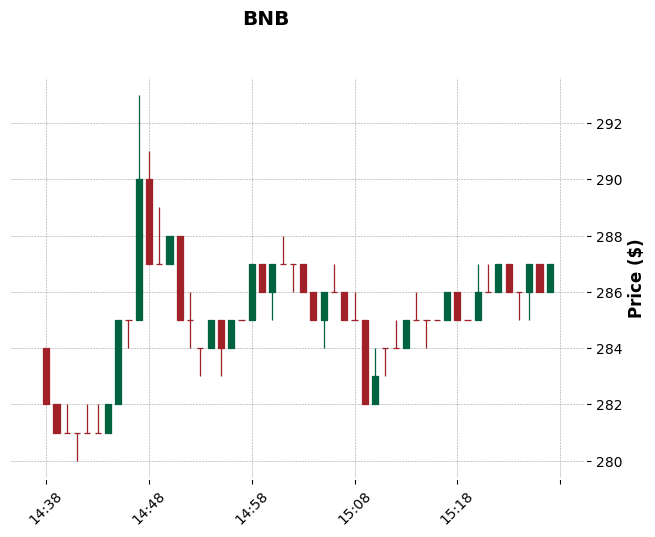

In [15]:
fplt.plot(box.head(50),
          type='candle',
          style='charles',
          title='BNB',
          ylabel='Price ($)')


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h3>Question  #1:</h3>

<b>What is the data type of the column "BNBBUSD_open"? </b>

</div>


In [16]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python
df['BNBBUSD_open'].dtypes
```

</details>


For example, we can calculate the correlation between variables  of type "int64" or "float64" using the method "corr":


In [17]:
corr = df.corr(numeric_only = True)
corr

,BNBBUSD_open,BNBBUSD_high,BNBBUSD_low,BNBBUSD_close,BNBBUSD_volume,BNBBUSD_rec_count,BNBBUSD_avg_price,APEBUSD_open,APEBUSD_high,APEBUSD_low,...,ADABUSD_volume,ADABUSD_rec_count,ADABUSD_avg_price,MATICBUSD_open,MATICBUSD_high,MATICBUSD_low,MATICBUSD_close,MATICBUSD_volume,MATICBUSD_rec_count,MATICBUSD_avg_price
BNBBUSD_open,1.000000,0.999956,0.999958,0.999935,-0.061799,0.010890,0.999967,0.250647,0.252052,0.249386,...,-0.083065,-0.004679,0.769463,0.618866,0.617979,0.619663,0.618823,0.053433,0.258563,0.618831
BNBBUSD_high,0.999956,1.000000,0.999920,0.999961,-0.056731,0.015686,0.999977,0.249402,0.250845,0.248144,...,-0.080747,-0.001697,0.770120,0.619194,0.618384,0.619997,0.619214,0.056423,0.261813,0.619206
BNBBUSD_low,0.999958,0.999920,1.000000,0.999964,-0.066521,0.006245,0.999978,0.251656,0.253065,0.250437,...,-0.086131,-0.007778,0.768870,0.618506,0.617624,0.619381,0.618531,0.050381,0.255340,0.618519
BNBBUSD_close,0.999935,0.999961,0.999964,1.000000,-0.061806,0.010811,0.999984,0.250567,0.252004,0.249343,...,-0.083818,-0.004901,0.769459,0.618796,0.617972,0.619661,0.618874,0.053259,0.258434,0.618836
BNBBUSD_volume,-0.061799,-0.056731,-0.066521,-0.061806,1.000000,0.656526,-0.061660,0.008723,0.010371,0.006663,...,0.390097,0.334676,-0.057885,-0.050414,-0.047651,-0.053644,-0.050839,0.317144,0.285104,-0.050690
BNBBUSD_rec_count,0.010890,0.015686,0.006245,0.010811,0.656526,1.000000,0.010935,-0.118481,-0.115769,-0.121211,...,0.381445,0.516385,0.067550,0.022055,0.026952,0.017314,0.021964,0.450606,0.548631,0.022134
BNBBUSD_avg_price,0.999967,0.999977,0.999978,0.999984,-0.061660,0.010935,1.000000,0.250513,0.251942,0.249279,...,-0.083504,-0.004779,0.769498,0.618847,0.618007,0.619693,0.618879,0.053366,0.258562,0.618868
APEBUSD_open,0.250647,0.249402,0.251656,0.250567,0.008723,-0.118481,0.250513,1.000000,0.999948,0.999956,...,-0.055062,-0.223533,-0.137835,0.122289,0.117682,0.126455,0.122298,-0.266672,-0.378364,0.122028
APEBUSD_high,0.252052,0.250845,0.253065,0.252004,0.010371,-0.115769,0.251942,0.999948,1.000000,0.999917,...,-0.053223,-0.220986,-0.136244,0.123205,0.118663,0.127379,0.123271,-0.263967,-0.375292,0.122986
APEBUSD_low,0.249386,0.248144,0.250437,0.249343,0.006663,-0.121211,0.249279,0.999956,0.999917,1.000000,...,-0.057562,-0.226261,-0.139320,0.121339,0.116739,0.125573,0.121410,-0.269374,-0.381361,0.121121


<AxesSubplot:>

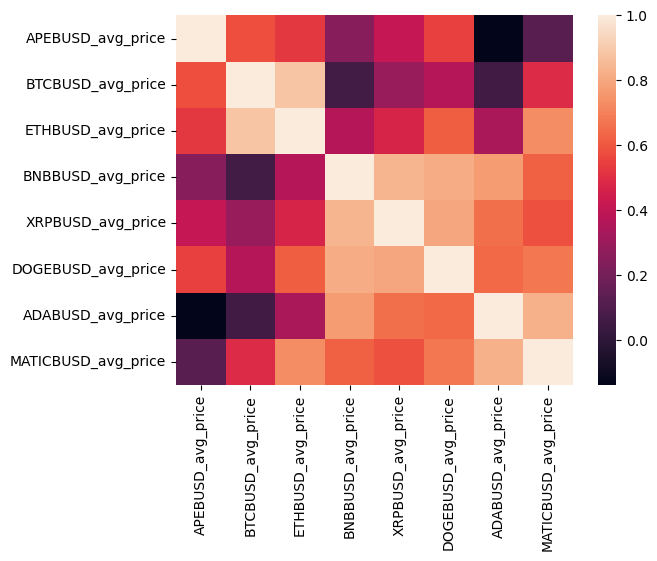

In [18]:
corr = df[["APEBUSD_avg_price","BTCBUSD_avg_price","ETHBUSD_avg_price","BNBBUSD_avg_price","XRPBUSD_avg_price",
         "DOGEBUSD_avg_price","ADABUSD_avg_price","MATICBUSD_avg_price"]].corr()
sns.heatmap(corr)

The diagonal elements are always one; we will study correlation more precisely Pearson correlation in-depth at the end of the notebook.


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h3> Question  #2: </h3>

<p>Find the correlation between the following columns: rec_count for BNB and ADA; and built a heatmap for them.</p>
<p>Hint: if you would like to select those columns, use the following syntax: df[["ADABUSD_rec_count","BNBBUSD_rec_count"]]</p>
</div>


<details><summary>Click here for the solution</summary>

```python
corr = df[["ADABUSD_rec_count","BNBBUSD_rec_count"]].corr()
sns.heatmap(corr)
```

</details>


<h2>Continuous Numerical Variables:</h2> 

<p>Continuous numerical variables are variables that may contain any value within some range. They can be of type "int64" or "float64". A great way to visualize these variables is by using scatterplots with fitted lines.</p>

<p>In order to start understanding the (linear) relationship between a volume for BNB and a volume for ADA, we can use "regplot" which plots the scatterplot plus the fitted regression line for the data.</p>


Let's see several examples of different linear relationships:


<h3>Positive Linear Relationship</h4>


Let's find the scatterplot of "BNBBUSD_avg_price" and "ADABUSD_avg_price".


(0.0, 0.3614326529285248)

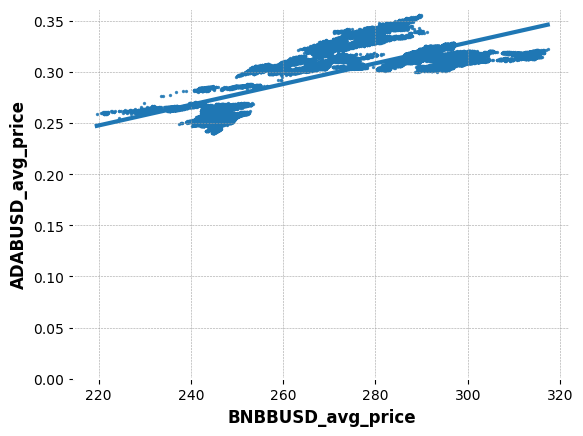

In [19]:
# volume price as potential predictor variable of volume
sns.regplot(x="BNBBUSD_avg_price", y="ADABUSD_avg_price", data=df,scatter_kws={'s':2})
plt.ylim(0,)

<p>As the BNBBUSD_avg_price goes up, the ADABUSD_avg_price goes up: this indicates a positive direct correlation between these two variables. BNBBUSD_avg_price seems like a good predictor of ADABUSD_avg_price since the regression line is almost a perfect diagonal line.</p>


We can examine the correlation between 'BNBBUSD_avg_price' and 'DOGEBUSD_avg_price' and see that it's approximately 0.82.


In [20]:
df[["BNBBUSD_avg_price", "DOGEBUSD_avg_price"]].corr()

,BNBBUSD_avg_price,DOGEBUSD_avg_price
BNBBUSD_avg_price,1.000000,0.817452
DOGEBUSD_avg_price,0.817452,1.000000


BNBBUSD_avg_price is a potential predictor variable of DOGEBUSD_avg_price. Let's find the scatterplot of "BNBUSD_avg_price" and "DOGEBUSD_avg_price".


<AxesSubplot:xlabel='BNBBUSD_avg_price', ylabel='DOGEBUSD_avg_price'>

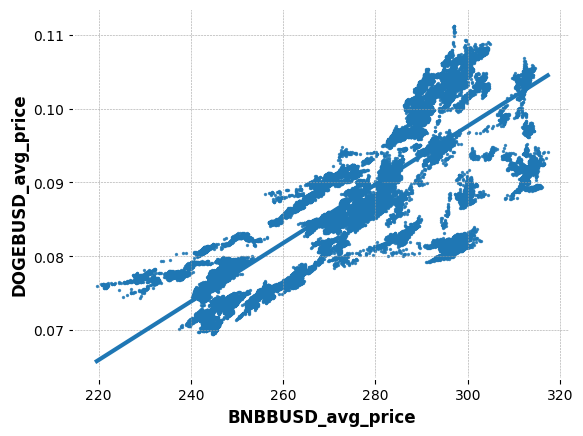

In [21]:
sns.regplot(x="BNBBUSD_avg_price", y="DOGEBUSD_avg_price", data=df,scatter_kws={'s':2})

<p>As BNBBUSD_avg_price goes up, the DOGEBUSD_avg_price goes up: this indicates a positive relationship between these two variables. BNBBUSD_avg_price could potentially be a predictor of DOGEBUSD_avg_price.</p>


We can examine the correlation between 'BNBBUSD_avg_price' and 'APEBUSD_avg_price' and see it's approximately 0.58.


In [22]:
df[['BTCBUSD_avg_price', 'APEBUSD_avg_price']].corr()

,BTCBUSD_avg_price,APEBUSD_avg_price
BTCBUSD_avg_price,1.000000,0.580604
APEBUSD_avg_price,0.580604,1.000000


<h3>Weak Linear Relationship</h3>


Let's see if "BNBBUSD_avg_price" is a predictor variable of "ADABUSD_avg_price".


<AxesSubplot:xlabel='BNBBUSD_avg_price', ylabel='ADABUSD_avg_price'>

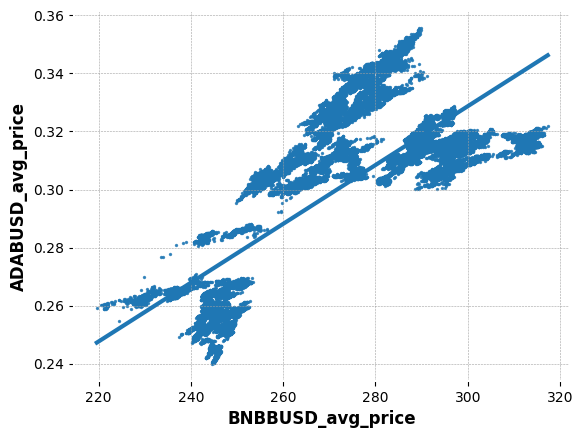

In [23]:
sns.regplot(x="BNBBUSD_avg_price", y="ADABUSD_avg_price", data=df,scatter_kws={'s':2})

<p>BNBBUSD_avg_price does not seem like a good predictor of the ADABUSD_avg_price at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore, it's not a reliable variable.</p>


We can examine the correlation between 'BNBBUSD_avg_price' and 'BTC_avg_price' and see it's approximately 0.065.


In [24]:
df[['BNBBUSD_avg_price','BTCBUSD_avg_price']].corr()

,BNBBUSD_avg_price,BTCBUSD_avg_price
BNBBUSD_avg_price,1.000000,0.064559
BTCBUSD_avg_price,0.064559,1.000000


 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  3 a): </h1>

<p>Find the correlation  between x="BNBBUSD_avg_price" and y="MATICBUSD_avg_price".</p>
<p>Hint: if you would like to select those columns, use the following syntax: df[["BNBBUSD_avg_price","MATICBUSD_avg_price"]].  </p>
</div>


In [25]:
# Write your code below and press Shift+Enter to execute
df[["BNBBUSD_avg_price","MATICBUSD_avg_price"]].corr()

,BNBBUSD_avg_price,MATICBUSD_avg_price
BNBBUSD_avg_price,1.000000,0.618868
MATICBUSD_avg_price,0.618868,1.000000


<details><summary>Click here for the solution</summary>

```python

#The correlation is 0.491169.

df[["BNBBUSD_avg_price","MATICBUSD_avg_price"]].corr()

```

</details>


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question  3 b):</h1>

<p>Given the correlation results between "
BNBBUSD_avg_price" and "MATICBUSD_avg_price", do you expect a linear relationship?</p> 
<p>Verify your results using the function "regplot()".</p>
</div>


<AxesSubplot:xlabel='BNBBUSD_avg_price', ylabel='MATICBUSD_avg_price'>

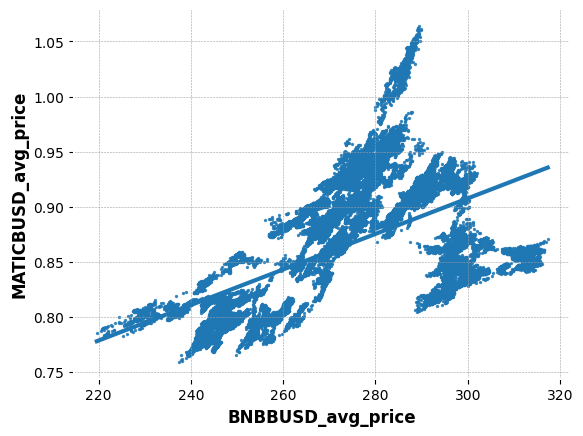

In [26]:
# Write your code below and press Shift+Enter to execute 
sns.regplot(x="BNBBUSD_avg_price", y="MATICBUSD_avg_price", data=df,scatter_kws={'s':2})

<details><summary>Click here for the solution</summary>

```python

#There is a positive correlation between the variable 'ETHBUSD_avg_price' and 'MATICBUSD_avg_price.'. We can see this using "regplot" to demonstrate this.

#Code: 
sns.regplot(x="BNBBUSD_avg_price", y="MATICBUSD_avg_price", data=df,scatter_kws={'s':2})

```

</details>


<h3>Make Categorical Variables for next point</h3>
<p>Let`s make categorical values as in the past lab.</p>

<p>We would like 5 bins of equal size bandwidth so we use numpy's <code>linspace(start_value, end_value, numbers_generated</code> function.</p>
<p>Since we want to include the minimum value of open, we want to set start_value = min(df["open"]).</p>
<p>Since we want to include the maximum value of open, we want to set end_value = max(df["open"]).</p>
<p>Since we are building 5 bins of equal length, there should be 6 dividers, so numbers_generated = 6.</p>


We build a bin array with a minimum value to a maximum value by using the bandwidth calculated above. The values will determine when one bin ends and another begins.


In [27]:
bins = np.linspace(min(df["BNBBUSD_avg_price"]), max(df["BNBBUSD_avg_price"]), 6)
bins

array([219.63313111, 239.16968751, 258.70624391, 278.24280031,
       297.77935671, 317.31591311])

We set group  names:


In [28]:
group_names = ['Low','Lower Medium' ,'Medium', 'Upper Medium' ,'High']

We apply the function "cut" to determine what each value of `df['BNBBUSD_avg_price']` belongs to.


In [29]:
df['BNBBUSD_avg_price-binned'] = pd.cut(df['BNBBUSD_avg_price'], bins, labels=group_names, include_lowest=True )
df[['BNBBUSD_avg_price','BNBBUSD_avg_price-binned']].head()

,BNBBUSD_avg_price,BNBBUSD_avg_price-binned
0,283.244612,Upper Medium
1,282.077591,Upper Medium
2,281.679925,Upper Medium
3,281.223183,Upper Medium
4,281.912312,Upper Medium


Same for DOGEBUSD_avg_price:

In [30]:
bins = np.linspace(min(df["DOGEBUSD_avg_price"]), max(df["DOGEBUSD_avg_price"]), 6)
bins

array([0.06942347, 0.07777601, 0.08612854, 0.09448108, 0.10283361,
       0.11118615])

In [31]:
df['DOGEBUSD_avg_price-binned'] = pd.cut(df['DOGEBUSD_avg_price'], bins, labels=group_names, include_lowest=True )
df[['DOGEBUSD_avg_price','DOGEBUSD_avg_price-binned']].head()

,DOGEBUSD_avg_price,DOGEBUSD_avg_price-binned
0,0.080926,Lower Medium
1,0.080565,Lower Medium
2,0.080577,Lower Medium
3,0.080715,Lower Medium
4,0.081038,Lower Medium


Same for BNBBUSD_rec_count:
    

In [32]:
bins = np.linspace(min(df["BNBBUSD_rec_count"]), max(df["BNBBUSD_rec_count"]), 6)
bins

array([  1. ,  23.6,  46.2,  68.8,  91.4, 114. ])

In [33]:
df['BNBBUSD_rec_count-binned'] = pd.cut(df['BNBBUSD_rec_count'], bins, labels=group_names, include_lowest=True )
df[['BNBBUSD_rec_count','BNBBUSD_rec_count-binned']].head()

,BNBBUSD_rec_count,BNBBUSD_rec_count-binned
0,62,Medium
1,67,Medium
2,60,Medium
3,66,Medium
4,61,Medium


<h3>Categorical Variables</h3>

<p>These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.</p>


Let's look at the relationship between "BNBBUSD_avg_price" and "BNBBUSD_avg_price-binned".


<AxesSubplot:xlabel='BNBBUSD_avg_price-binned', ylabel='BNBBUSD_avg_price'>

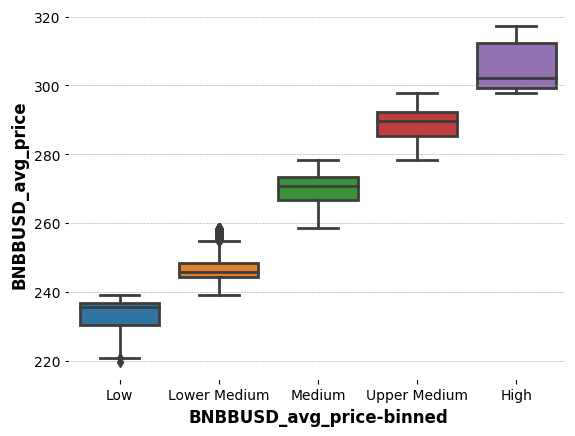

In [34]:
sns.boxplot(x="BNBBUSD_avg_price-binned", y="BNBBUSD_avg_price", data=df)

<p>Here we see that the distribution of price between these five categories are distinct enough to take in which catagery price will be as a potential good predictor of price. Let's examine engine "DOGEBUSD_avg_price" and "DOGEBUSD_avg_price-bined":</p>


<AxesSubplot:xlabel='DOGEBUSD_avg_price-binned', ylabel='DOGEBUSD_avg_price'>

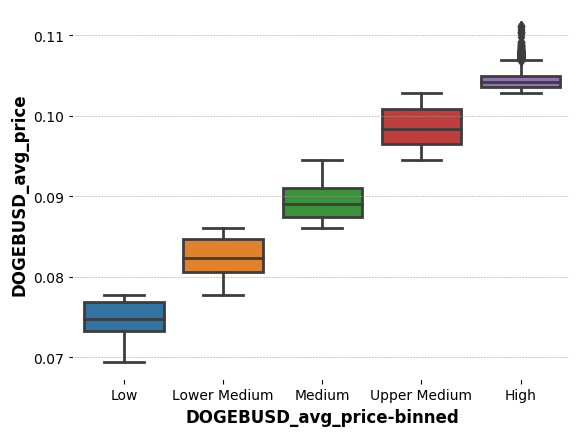

In [35]:
sns.boxplot(x="DOGEBUSD_avg_price-binned", y="DOGEBUSD_avg_price", data=df)


<p>We can see the same.</p>


Let's examine "BNBBUSD_avg_price-binned" and "DOGEBUSD_avg_price".


<AxesSubplot:xlabel='BNBBUSD_avg_price-binned', ylabel='DOGEBUSD_avg_price'>

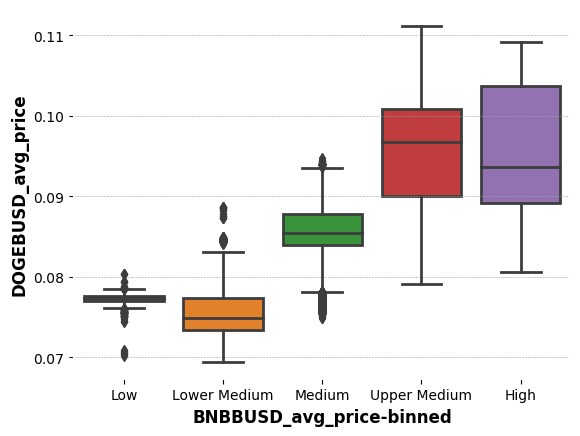

In [36]:
# drive-wheels
sns.boxplot(x="BNBBUSD_avg_price-binned", y="DOGEBUSD_avg_price", data=df)

<p><p>We see that the distributions of price between the different categories have a significant overlap, so BNBBUSD_avg_price-binned would not be a good predictor of DOGEBUSD_avg_price. </p>
</p>


<h2 id="discriptive_statistics">3. Descriptive Statistical Analysis</h2>


<p>Let's first take a look at the variables by utilizing a description method.</p>

<p>The <b>describe</b> function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.</p>

This will show:

<ul>
    <li>the count of that variable</li>
    <li>the mean</li>
    <li>the standard deviation (std)</li> 
    <li>the minimum value</li>
    <li>the IQR (Interquartile Range: 25%, 50% and 75%)</li>
    <li>the maximum value</li>
<ul>


We can apply the method "describe" as follows:


In [37]:
df.describe()

,BNBBUSD_open,BNBBUSD_high,BNBBUSD_low,BNBBUSD_close,BNBBUSD_volume,BNBBUSD_rec_count,BNBBUSD_avg_price,APEBUSD_open,APEBUSD_high,APEBUSD_low,...,ADABUSD_volume,ADABUSD_rec_count,ADABUSD_avg_price,MATICBUSD_open,MATICBUSD_high,MATICBUSD_low,MATICBUSD_close,MATICBUSD_volume,MATICBUSD_rec_count,MATICBUSD_avg_price
count,63947.000000,63947.000000,63947.000000,63947.000000,63947.000000,63947.000000,63947.000000,63947.000000,63947.000000,63947.000000,...,6.394700e+04,63947.000000,63947.000000,63947.000000,63947.000000,63947.000000,63947.000000,6.394700e+04,63947.00000,63947.000000
mean,273.854085,273.965742,273.744543,273.853002,353.725565,20.533582,273.854682,3.596160,3.598828,3.593529,...,4.594839e+04,9.395390,0.302205,0.865400,0.865858,0.864956,0.865395,3.636599e+04,17.83430,0.865409
std,21.115180,21.118470,21.112490,21.114934,795.678062,15.007314,21.115321,0.420607,0.420654,0.420487,...,1.001990e+05,9.568208,0.027798,0.055036,0.055182,0.054906,0.055033,6.299747e+04,13.99466,0.055044
min,219.660000,220.370000,219.130000,219.700000,0.020000,1.000000,219.633131,2.617000,2.621000,2.611000,...,1.000000e+00,1.000000,0.239938,0.760600,0.762000,0.755400,0.760600,1.000000e+00,1.00000,0.759138
25%,250.585000,250.740000,250.440000,250.580000,60.310000,10.000000,250.595362,3.258000,3.260000,3.256000,...,6.946000e+03,4.000000,0.283572,0.810200,0.810600,0.809800,0.810200,6.902500e+03,8.00000,0.810177
50%,276.320000,276.480000,276.150000,276.330000,149.840000,17.000000,276.310000,3.597000,3.599000,3.596000,...,2.075600e+04,7.000000,0.312099,0.870500,0.870900,0.870100,0.870500,1.768300e+04,14.00000,0.870488
75%,290.590000,290.660000,290.510000,290.590000,357.390000,27.000000,290.587961,3.966000,3.968000,3.963000,...,4.858750e+04,12.000000,0.318920,0.910900,0.911200,0.910600,0.910900,4.096950e+04,25.00000,0.910885
max,317.210000,317.660000,316.650000,317.200000,36434.320000,114.000000,317.315913,4.487000,4.487000,4.444000,...,4.868805e+06,114.000000,0.355647,1.066100,1.066200,1.061200,1.065700,2.136991e+06,104.00000,1.064086


The default setting of "describe" skips variables of type category. We can apply the method "describe" on the variables of type 'category' as follows:


In [38]:
df.describe(include='category')

,BNBBUSD_avg_price-binned,DOGEBUSD_avg_price-binned,BNBBUSD_rec_count-binned
count,63947,63947,63947
unique,5,5,5
top,Upper Medium,Low,Low
freq,23987,16203,43973


<h3>Value Counts</h3>


<p>Value counts is a good way of understanding how many units of each characteristic/variable we have. We can apply the "value_counts" method on the column "BNBBUSD_avg_price-binned". Don’t forget the method "value_counts" only works on pandas series, not pandas dataframes. As a result, we only include one bracket <code>df['BNBBUSD_avg_price-binned']</code>, not two brackets <code>df[['BNBBUSD_avg_price-binned']]</code>.</p>


In [39]:
df['BNBBUSD_avg_price-binned'].value_counts()

Upper Medium    23987
Lower Medium    17056
Medium          14841
High             6685
Low              1378
Name: BNBBUSD_avg_price-binned, dtype: int64

We can convert the series to a dataframe as follows:


In [40]:
df['BNBBUSD_avg_price-binned'].value_counts().to_frame()

,BNBBUSD_avg_price-binned
Upper Medium,23987
Lower Medium,17056
Medium,14841
High,6685
Low,1378


Let's repeat the above steps but save the results to the dataframe "BNBBUSD_avg_price_binned_counts" and rename the column  'BNBBUSD_avg_price-binned' to 'value_counts'.


In [41]:
BNBBUSD_avg_price_binned_counts = df['BNBBUSD_avg_price-binned'].value_counts().to_frame()
BNBBUSD_avg_price_binned_counts.rename(columns={'BNBBUSD_avg_price-binned': 'value_counts'}, inplace=True)
BNBBUSD_avg_price_binned_counts

,value_counts
Upper Medium,23987
Lower Medium,17056
Medium,14841
High,6685
Low,1378


Now let's rename the index to 'drive-wheels':


In [42]:
BNBBUSD_avg_price_binned_counts.index.name = 'BNBBUSD_avg_price-binned'
BNBBUSD_avg_price_binned_counts

,value_counts
BNBBUSD_avg_price-binned,
Upper Medium,23987
Lower Medium,17056
Medium,14841
High,6685
Low,1378


<p>After examining the value counts of the BNBBUSD_avg_price-binned, we see that this category would be a good predictor variable for the price. This is because we only have mostly our prices in 'Medium'.</p>


<h2 id="basic_grouping">4. Basics of Grouping</h2>


<p>The "groupby" method groups data by different categories. The data is grouped based on one or several variables, and analysis is performed on the individual groups.</p>

<p>For example, let's group by the variable "BNBBUSD_avg_price-binned". We see that there are 5 different categories of BNBBUSD_avg_price-binned.</p>


In [43]:
df['BNBBUSD_avg_price-binned'].unique()

['Upper Medium', 'Medium', 'Lower Medium', 'High', 'Low']
Categories (5, object): ['Low' < 'Lower Medium' < 'Medium' < 'Upper Medium' < 'High']

<p>If we want to know, on average, which type of BNBBUSD_avg_price-binned is most valuable, we can group "BNBBUSD_avg_price-binned" and then average them.</p>

<p>We can select the columns 'BNBBUSD_avg_price-binned' and 'BNBBUSD_avg_price', then assign it to the variable "df_group_one".</p>


In [44]:
df_group_one = df[['BNBBUSD_avg_price-binned','BNBBUSD_avg_price']]

We can then calculate the average price for each of the different categories of data.


In [45]:
# grouping results
df_group_one = df_group_one.groupby(['BNBBUSD_avg_price-binned'],as_index=False).mean()
df_group_one

,BNBBUSD_avg_price-binned,BNBBUSD_avg_price
0,Low,233.908361
1,Lower Medium,246.741647
2,Medium,270.034761
3,Upper Medium,289.102646
4,High,305.032616


<p>From our data, it seems High category are the most expensive.</p>

<p>You can also group by multiple variables. For example, let's group by both 'BNBBUSD_avg_price-binned' and 'DOGEBUSD_avg_price-binned'. This groups the dataframe by the unique combination of 'BNBBUSD_avg_price-binned' and 'DOGEBUSD_avg_price-binned'. We can store the results in the variable 'grouped_test1'.</p>


In [46]:
# grouping results
df_gptest = df[['BNBBUSD_avg_price-binned','DOGEBUSD_avg_price-binned','BNBBUSD_avg_price']]
grouped_test1 = df_gptest.groupby(['BNBBUSD_avg_price-binned','DOGEBUSD_avg_price-binned'],as_index=False).mean()
grouped_test1

,BNBBUSD_avg_price-binned,DOGEBUSD_avg_price-binned,BNBBUSD_avg_price
0,Low,Low,233.739270
1,Low,Lower Medium,235.440055
2,Low,Medium,NaN
3,Low,Upper Medium,NaN
4,Low,High,NaN
5,Lower Medium,Low,246.617140
6,Lower Medium,Lower Medium,247.257989
7,Lower Medium,Medium,257.659995
8,Lower Medium,Upper Medium,NaN
9,Lower Medium,High,NaN


<p>This grouped data is much easier to visualize when it is made into a pivot table. A pivot table is like an Excel spreadsheet, with one variable along the column and another along the row. We can convert the dataframe to a pivot table using the method "pivot" to create a pivot table from the groups.</p>

<p>In this case, we will leave the BNBBUSD_avg_price-binned variable as the rows of the table, and DOGEBUSD_avg_price-binned to become the columns of the table:</p>


In [47]:
grouped_pivot = grouped_test1.pivot(index='DOGEBUSD_avg_price-binned',columns='BNBBUSD_avg_price-binned')
grouped_pivot

BNBBUSD_avg_price                           \
BNBBUSD_avg_price-binned                Low Lower Medium      Medium   
DOGEBUSD_avg_price-binned                                              
Low                              233.739270   246.617140  261.602371   
Lower Medium                     235.440055   247.257989  270.142580   
Medium                                  NaN   257.659995  271.213813   
Upper Medium                            NaN          NaN  273.186780   
High                                    NaN          NaN         NaN   

                                                    
BNBBUSD_avg_price-binned  Upper Medium        High  
DOGEBUSD_avg_price-binned                           
Low                                NaN         NaN  
Lower Medium                291.660190  298.785159  
Medium                      282.963229  308.321234  
Upper Medium                289.500417  306.271682  
High                        293.885897  303.696707

<p>Often, we won't have data for some of the pivot cells. We can fill these missing cells with the value 0, but any other value could potentially be used as well. It should be mentioned that missing data is quite a complex subject and is an entire course on its own.</p>


In [48]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

BNBBUSD_avg_price                           \
BNBBUSD_avg_price-binned                Low Lower Medium      Medium   
DOGEBUSD_avg_price-binned                                              
Low                              233.739270   246.617140  261.602371   
Lower Medium                     235.440055   247.257989  270.142580   
Medium                             0.000000   257.659995  271.213813   
Upper Medium                       0.000000     0.000000  273.186780   
High                               0.000000     0.000000    0.000000   

                                                    
BNBBUSD_avg_price-binned  Upper Medium        High  
DOGEBUSD_avg_price-binned                           
Low                           0.000000    0.000000  
Lower Medium                291.660190  298.785159  
Medium                      282.963229  308.321234  
Upper Medium                289.500417  306.271682  
High                        293.885897  303.696707

Also we can use a crossed table to see how many values correspond to each other in the table:

In [49]:
crossed_table = pd.crosstab(df['DOGEBUSD_avg_price-binned'],df['BNBBUSD_avg_price-binned'])
crossed_table

BNBBUSD_avg_price-binned,Low,Lower Medium,Medium,Upper Medium,High
DOGEBUSD_avg_price-binned,,,,,
Low,1241,14002,960,0,0
Lower Medium,137,3038,7725,3195,992
Medium,0,16,6154,4366,2478
Upper Medium,0,0,2,13667,910
High,0,0,0,2759,2305


As we can see, mostly they correspond when bin for DOGE is 'Upper Medium' and bin for BTC is 'Medium'.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question 4:</h1>

<p>Use the "groupby" function to find the average "DOGEBUSD_avg_price" of each trade based on "DOGEBUSD_avg_price-binned".</p>
</div>


In [50]:
# Write your code below and press Shift+Enter to execute 
# grouping results
df_gptest2 = df[['DOGEBUSD_avg_price','DOGEBUSD_avg_price-binned']]
grouped_test_bodystyle = df_gptest2.groupby(['DOGEBUSD_avg_price-binned'],as_index= False).mean()
grouped_test_bodystyle


,DOGEBUSD_avg_price-binned,DOGEBUSD_avg_price
0,Low,0.074665
1,Lower Medium,0.082320
2,Medium,0.089316
3,Upper Medium,0.098580
4,High,0.104497


<details><summary>Click here for the solution</summary>

```python
# grouping results
df_gptest2 = df[['DOGEBUSD_avg_price','DOGEBUSD_avg_price-binned']]
grouped_test_bodystyle = df_gptest2.groupby(['DOGEBUSD_avg_price-binned'],as_index= False).mean()
grouped_test_bodystyle

```

</details>


If you did not import "pyplot", let's do it again.


In [51]:
import matplotlib.pyplot as plt
%matplotlib inline 

<h4>Variables: ETHBUSD_avg_price-binned vs. DOGEBUSD_avg_price-binned</h4>


Let's use a heat map to visualize the relationship between ETHBUSD_avg_price-binned vs DOGEBUSD_avg_price-binned.


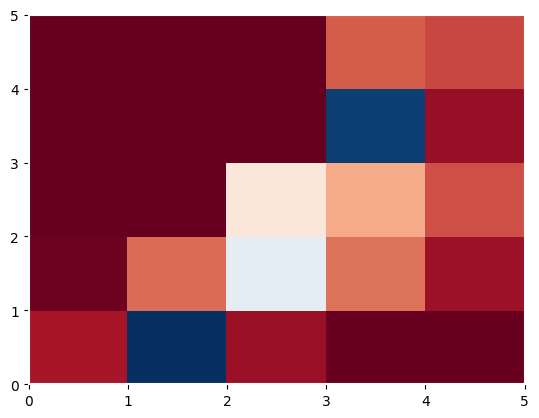

In [52]:
#use the grouped results
plt.grid(False)
plt.pcolor(crossed_table, cmap='RdBu')
plt.show()

<p>The heatmap plots the target variable (price) proportional to colour with respect to the variables 'DOGEBUSD_avg_price-binned' and 'ETHBUSD_avg_price-binned' on the vertical and horizontal axis, respectively. This allows us to visualize how the price is related to 'ETHBUSD_avg_price-binned' and 'DOGEBUSD_avg_price-binned'.</p>

<p>The default labels convey no useful information to us. Let's change that:</p>


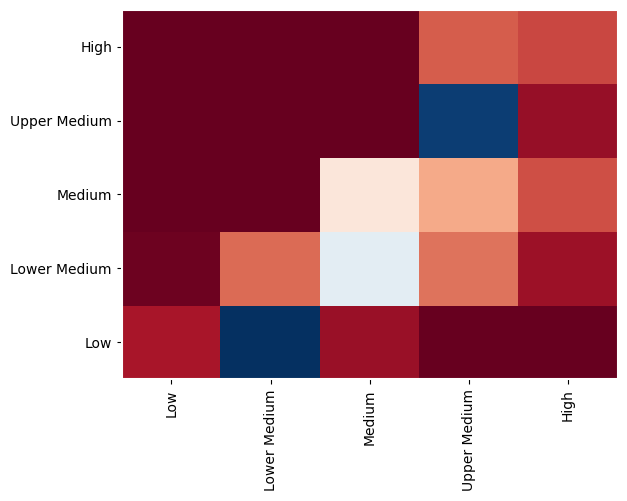

In [53]:
fig, ax = plt.subplots()
plt.grid(False)
im = ax.pcolor(crossed_table, cmap='RdBu')

#label names
row_labels = crossed_table.columns
col_labels = crossed_table.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)
plt.show()

<p>Visualization is very important in data science, and Python visualization packages provide great freedom. We will go more in-depth in a separate Python visualizations course.</p>

<p>The main question we want to answer in this module is, "What are the main characteristics that have the most impact on the BNB price?".</p>

<p>To get a better measure of the important characteristics, we look at the correlation of these variables with the BNB avg price. In other words: how is the BNB avg price dependent on this variable?</p>


<h2 id="correlation_causation">5. Correlation and Causation</h2>


<p><b>Correlation</b>: a measure of the extent of interdependence between variables.</p>

<p><b>Causation</b>: the relationship between cause and effect between two variables.</p>

<p>It is important to know the difference between these two. Correlation does not imply causation. Determining correlation is much simpler  the determining causation as causation may require independent experimentation.</p>


<p><b>Pearson Correlation</b></p>
<p>The Pearson Correlation measures the linear dependence between two variables X and Y.</p>
<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b>: Perfect positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Perfect negative linear correlation.</li>
</ul>


<p>Pearson Correlation is the default method of the function "corr". Like before, we can calculate the Pearson Correlation of the of the 'int64' or 'float64'  variables.</p>


In [54]:
df.corr(numeric_only = True)

,BNBBUSD_open,BNBBUSD_high,BNBBUSD_low,BNBBUSD_close,BNBBUSD_volume,BNBBUSD_rec_count,BNBBUSD_avg_price,APEBUSD_open,APEBUSD_high,APEBUSD_low,...,ADABUSD_volume,ADABUSD_rec_count,ADABUSD_avg_price,MATICBUSD_open,MATICBUSD_high,MATICBUSD_low,MATICBUSD_close,MATICBUSD_volume,MATICBUSD_rec_count,MATICBUSD_avg_price
BNBBUSD_open,1.000000,0.999956,0.999958,0.999935,-0.061799,0.010890,0.999967,0.250647,0.252052,0.249386,...,-0.083065,-0.004679,0.769463,0.618866,0.617979,0.619663,0.618823,0.053433,0.258563,0.618831
BNBBUSD_high,0.999956,1.000000,0.999920,0.999961,-0.056731,0.015686,0.999977,0.249402,0.250845,0.248144,...,-0.080747,-0.001697,0.770120,0.619194,0.618384,0.619997,0.619214,0.056423,0.261813,0.619206
BNBBUSD_low,0.999958,0.999920,1.000000,0.999964,-0.066521,0.006245,0.999978,0.251656,0.253065,0.250437,...,-0.086131,-0.007778,0.768870,0.618506,0.617624,0.619381,0.618531,0.050381,0.255340,0.618519
BNBBUSD_close,0.999935,0.999961,0.999964,1.000000,-0.061806,0.010811,0.999984,0.250567,0.252004,0.249343,...,-0.083818,-0.004901,0.769459,0.618796,0.617972,0.619661,0.618874,0.053259,0.258434,0.618836
BNBBUSD_volume,-0.061799,-0.056731,-0.066521,-0.061806,1.000000,0.656526,-0.061660,0.008723,0.010371,0.006663,...,0.390097,0.334676,-0.057885,-0.050414,-0.047651,-0.053644,-0.050839,0.317144,0.285104,-0.050690
BNBBUSD_rec_count,0.010890,0.015686,0.006245,0.010811,0.656526,1.000000,0.010935,-0.118481,-0.115769,-0.121211,...,0.381445,0.516385,0.067550,0.022055,0.026952,0.017314,0.021964,0.450606,0.548631,0.022134
BNBBUSD_avg_price,0.999967,0.999977,0.999978,0.999984,-0.061660,0.010935,1.000000,0.250513,0.251942,0.249279,...,-0.083504,-0.004779,0.769498,0.618847,0.618007,0.619693,0.618879,0.053366,0.258562,0.618868
APEBUSD_open,0.250647,0.249402,0.251656,0.250567,0.008723,-0.118481,0.250513,1.000000,0.999948,0.999956,...,-0.055062,-0.223533,-0.137835,0.122289,0.117682,0.126455,0.122298,-0.266672,-0.378364,0.122028
APEBUSD_high,0.252052,0.250845,0.253065,0.252004,0.010371,-0.115769,0.251942,0.999948,1.000000,0.999917,...,-0.053223,-0.220986,-0.136244,0.123205,0.118663,0.127379,0.123271,-0.263967,-0.375292,0.122986
APEBUSD_low,0.249386,0.248144,0.250437,0.249343,0.006663,-0.121211,0.249279,0.999956,0.999917,1.000000,...,-0.057562,-0.226261,-0.139320,0.121339,0.116739,0.125573,0.121410,-0.269374,-0.381361,0.121121


Sometimes we would like to know the significant of the correlation estimate.


<b>P-value</b>

<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the

<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>


We can obtain this information using  "stats" module in the "scipy"  library.


In [55]:
from scipy import stats


<h3>"BNBBUSD_avg_price" vs. "DOGEBUSD_avg_price"</h3>


Let's calculate the  Pearson Correlation Coefficient and P-value of "BNBBUSD_avg_orice" and "DOGEBUSD_avg_price".


In [56]:
pearson_coef, p_value = stats.pearsonr(df["BNBBUSD_avg_price"], df["DOGEBUSD_avg_price"])
print("The Pearson Correlation Coefficient is", round(pearson_coef, 2), " with a P-value of P =", round(p_value, 2))  

The Pearson Correlation Coefficient is 0.82  with a P-value of P = 0.0


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between "BNBBUSD_avg_price" and "DOGEBUSD_avg_price" is statistically significant and the linear relationship is strong enough (≈ 0.82).</p>


<h3>"BNBBUSD_avg_price" vs. "ETHBUSD_avg_price"</h3>


Let's calculate the  Pearson Correlation Coefficient and P-value of "BNBBUSD_avg_price" and "ETHBUSD_avg_price".


In [57]:
pearson_coef, p_value = stats.pearsonr(df["BNBBUSD_avg_price"], df["ETHBUSD_avg_price"])
print("The Pearson Correlation Coefficient is", round(pearson_coef, 2), " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.37  with a P-value of P =  0.0


<h4>Conclusion:</h4>

<p>Since the p-value is $<$ 0.001, the correlation between "ETHBUSD_avg_price" and "BNBBUSD_avg_price" is statistically significant, and the linear relationship is quite weak (≈ 0.37).</p>


<h3>BNBBUSD_avg_price" vs. "ADABUSD_avg_price"</h3>

Let's calculate the  Pearson Correlation Coefficient and P-value of "BNBBUSD_avg_price" and "ADABUSD_avg_price".


In [83]:
pearson_coef, p_value = stats.pearsonr(df["BNBBUSD_avg_price"], df["ADABUSD_avg_price"])
print("The Pearson Correlation Coefficient is", round(pearson_coef, 2), " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.77  with a P-value of P =  0.0


#### Conclusion:

Since the p-value is < 0.001, the correlation between "ETHBUSD_avg_price" and "BTCBUSD_avg_price" is statistically significant and the linear relationship is strong enough (≈ 0.77).


### "BNBBUSD_avg_price" vs. "APEBUSD_avg_price"


Let's calculate the Pearson Correlation Coefficient and P-value of "BNBBUSD_avg_price" and "APEBUSD_avg_price":


In [59]:
pearson_coef, p_value = stats.pearsonr(df["BNBBUSD_avg_price"], df["APEBUSD_avg_price"])
print( "The Pearson Correlation Coefficient is", round(pearson_coef, 2), " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.25  with a P-value of P =  0.0


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between "BNBBUSD_avg_price" and "APEBUSD_avg_price" is statistically significant, and the linear relationship is only moderate (≈ 0.25).</p>


<h3>"BNBBUSD_avg_price" vs. "XRPBUSD_avg_price"</h3>


Let's calculate the  Pearson Correlation Coefficient and P-value of "BNBBUSD_avg_price" and "XRPBUSD_avg_price":


In [60]:
pearson_coef, p_value = stats.pearsonr(df["BNBBUSD_avg_price"], df["XRPBUSD_avg_price"])
print("The Pearson Correlation Coefficient is", round(pearson_coef, 2), " with a P-value of P =  ", p_value ) 

The Pearson Correlation Coefficient is 0.84  with a P-value of P =   0.0


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between "BNBBUSD_avg_price" and "XRPBUSD_avg_price" is statistically significant and the linear relationship is strong enough (≈ 0.84).</p>


<h2 id="anova">6. ANOVA</h2>


<h3>ANOVA: Analysis of Variance</h3>
<p>The Analysis of Variance  (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:</p>

<p><b>F-test score</b>: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.</p>

<p><b>P-value</b>:  P-value tells how statistically significant our calculated score value is.</p>

<p>If our price variable is strongly correlated with the variable we are analyzing, we expect ANOVA to return a sizeable F-test score and a small p-value.</p>


<h3>BNBBUSD_ap_cat</h3>


<p>Since ANOVA analyzes the difference between different groups of the same variable, the groupby function will come in handy. Because the ANOVA algorithm averages the data automatically, we do not need to take the average before hand.</p>

In [61]:
grouped_test2 = df[["BNBBUSD_rec_count-binned", "BNBBUSD_avg_price"]].groupby(["BNBBUSD_rec_count-binned"])
grouped_test2.head()

,BNBBUSD_rec_count-binned,BNBBUSD_avg_price
0,Medium,283.244612
1,Medium,282.077591
2,Medium,281.679925
3,Medium,281.223183
4,Medium,281.912312
6,Lower Medium,282.228133
7,Upper Medium,284.173484
8,Upper Medium,285.059958
9,High,289.195540
10,High,288.619311


We can obtain the values of the method group using the method "get_group".


In [62]:
grouped_test2.get_group("Medium")["BNBBUSD_avg_price"]

0        283.244612
1        282.077591
2        281.679925
3        281.223183
4        281.912312
            ...    
63144    245.958890
63145    246.195889
63147    246.077492
63746    244.664898
63867    245.898046
Name: BNBBUSD_avg_price, Length: 3161, dtype: float64

We can use the function "f_oneway" in the module "stats" to obtain the <b>F-test score</b> and <b>P-value</b>.


In [84]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group("Low")["BNBBUSD_avg_price"], grouped_test2.get_group("Lower Medium")["BNBBUSD_avg_price"], grouped_test2.get_group("Medium")["BNBBUSD_avg_price"], grouped_test2.get_group("Upper Medium")["BNBBUSD_avg_price"], grouped_test2.get_group("High")["BNBBUSD_avg_price"])  
 
print("ANOVA results: F=", round(f_val, 2), ", P =", round(p_val, 2))

ANOVA results: F= 13.73 , P = 0.0


This is a great result with a large F-test score showing a strong correlation and a P-value of 0 implying almost certain statistical significance. But does this mean all five tested groups are all this highly correlated?

Let's examine them separately.


#### Low and Lower Medium


In [85]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group("Low")["BNBBUSD_avg_price"], grouped_test2.get_group("Lower Medium")["BNBBUSD_avg_price"])  
 
print( "ANOVA results: F=", round(f_val, 2), ", P =", round(p_val, 2) )

ANOVA results: F= 10.55 , P = 0.0


Let's examine the other groups.


#### Low and Medium


In [86]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group("Low")["BNBBUSD_avg_price"], grouped_test2.get_group("Medium")["BNBBUSD_avg_price"])  
   
print( "ANOVA results: F=", round(f_val, 2), ", P =", round(p_val, 2))   

ANOVA results: F= 3.7 , P = 0.05


<h4>Low and Upper Medium</h4>


In [87]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group("Low")["BNBBUSD_avg_price"], grouped_test2.get_group("Upper Medium")["BNBBUSD_avg_price"])  
 
print("ANOVA results: F=", round(f_val, 2), ", P =", round(p_val, 2))   

ANOVA results: F= 23.67 , P = 0.0


<h4>Low and High</h4>


In [67]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group("Low")["BNBBUSD_avg_price"], grouped_test2.get_group("High")["BNBBUSD_avg_price"])  
 
print("ANOVA results: F=", round(f_val, 2), ", P =", p_val)   

ANOVA results: F= 14.34 , P = 0.00015245102916152777


<h4>Lower Medium and Medium</h4>


In [88]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group("Lower Medium")["BNBBUSD_avg_price"], grouped_test2.get_group("Medium")["BNBBUSD_avg_price"])  
 
print("ANOVA results: F=", round(f_val, 2), ", P =", round(p_val, 2))   

ANOVA results: F= 10.43 , P = 0.0


<h4>Lower Medium and Upper Medium</h4>


In [69]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group("Lower Medium")["BNBBUSD_avg_price"], grouped_test2.get_group("Upper Medium")["BNBBUSD_avg_price"])  
 
print("ANOVA results: F=", round(f_val, 2), ", P =", p_val)   

ANOVA results: F= 29.01 , P = 7.316283535485033e-08


<h4>Lower Medium and High</h4>


In [89]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group("Lower Medium")["BNBBUSD_avg_price"], grouped_test2.get_group("High")["BNBBUSD_avg_price"])  
 
print("ANOVA results: F=", round(f_val, 2), ", P =", round(p_val, 2))   

ANOVA results: F= 15.85 , P = 0.0


<h4>Medium and Upper Medium</h4>


In [92]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group("Medium")["BNBBUSD_avg_price"], grouped_test2.get_group("Upper Medium")["BNBBUSD_avg_price"])  
 
print("ANOVA results: F=", round(f_val, 2), ", P =", round(p_val, 2))   

ANOVA results: F= 10.19 , P = 0.0


<h4>Medium and High</h4>


In [91]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group("Medium")["BNBBUSD_avg_price"], grouped_test2.get_group("High")["BNBBUSD_avg_price"])  
 
print("ANOVA results: F=", f_val, ", P =", round(p_val, 2))   

ANOVA results: F= 9.128396963839139 , P = 0.0


<h4>Upper Medium and High</h4>


In [90]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group("Upper Medium")["BNBBUSD_avg_price"], grouped_test2.get_group("High")["BNBBUSD_avg_price"])  
 
print("ANOVA results: F=", round(f_val, 2), ", P =", round(p_val, 2))   

ANOVA results: F= 1.67 , P = 0.2


<h2 id="durbin">7. Durbin-Watson Test</h2>

<h4>What is Durbin-Watson Test?</h4>

In regression analysis, Durbin-Watson (DW) is useful for checking the first-order autocorrelation (serial correlation). It analyzes the residuals for independence over time points (autocorrelation). The autocorrelation varies from -1 (negative autocorrelation) to 1 (positive autocorrelation).

Durbin-Watson test analyzes the following hypotheses,

Null hypothesis (H<sub>0</sub>): Residuals from the regression are not autocorrelated (autocorrelation coefficient, ρ = 0)
Alternative hypothesis (H<sub>a</sub>): Residuals from the regression are autocorrelated (autocorrelation coefficient, ρ > 0)

We will use <b>durbin_watson</b> for Durbin-Watson Test and <b>OLS</b> to get residuals from "statsmodels" library

In [74]:
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson as dwtest

X = df["BNBBUSD_avg_price"] # independent
y = df["DOGEBUSD_avg_price"] # dependent
# to get intercept
X = sm.add_constant(X)
# fit the regression model
reg = sm.OLS(y, X).fit()

In [75]:
dwtest(resids=np.array(reg.resid))

0.0002980399883280417

In [76]:

currs = ["APEBUSD", "BTCBUSD", "ETHBUSD", "BNBBUSD", "XRPBUSD", "DOGEBUSD", "ADABUSD", "MATICBUSD"]
import itertools

cols = [f"{curr}_dep" for curr in currs]
idxs = [f"{curr}_ind" for curr in currs]

dw_df = pd.DataFrame(columns=cols, index=idxs)

for (curr1, curr2) in itertools.permutations(currs, 2):
    X = df[f"{curr1}_avg_price"] # independent
    y = df[f"{curr2}_avg_price"] # dependent
    # to get intercept
    X = sm.add_constant(X)
    # fit the regression model
    reg = sm.OLS(y, X).fit()
    dw = dwtest(resids=np.array(reg.resid))
    dw_df.loc[f"{curr2}_ind", f"{curr1}_dep"] = dw
    
np.fill_diagonal(dw_df.values, "—")
    
dw_df

,APEBUSD_dep,BTCBUSD_dep,ETHBUSD_dep,BNBBUSD_dep,XRPBUSD_dep,DOGEBUSD_dep,ADABUSD_dep,MATICBUSD_dep
APEBUSD_ind,—,0.00026,0.000179,0.000126,0.000151,0.000162,0.000155,0.000122
BTCBUSD_ind,0.00065,—,0.000727,0.000512,0.00046,0.000499,0.000514,0.000433
ETHBUSD_ind,0.000433,0.000591,—,0.000363,0.00035,0.000433,0.000361,0.000409
BNBBUSD_ind,0.000098,0.000093,0.000081,—,0.000602,0.000279,0.000176,0.000143
XRPBUSD_ind,0.000323,0.000242,0.000268,0.000802,—,0.000649,0.000398,0.000321
DOGEBUSD_ind,0.000152,0.000099,0.000169,0.000298,0.000468,—,0.000144,0.000188
ADABUSD_ind,0.000093,0.000062,0.000045,0.000142,0.000165,0.000092,—,0.000322
MATICBUSD_ind,0.000249,0.000171,0.000283,0.000299,0.000277,0.000325,0.000511,—


Above we can see a matrix that consists of all the p-values. How to interpret these values? We take any value, its column will be responsible for the dependent value, and the row - for the independent value

<h2 id="granger">8. Granger Causality Test</h2>

<h4>What is Granger Causality Test?</h4>

Granger Causality test is a statistical test that is used to determine if a given time series and it’s lags is helpful in explaining the value of another series. 

The Null hypothesis for grangercausalitytests is that the time series in
the second column, x<sub>2</sub>, does NOT Granger cause the time series in the first
column, x<sub>1</sub>. Grange causality means that past values of x<sub>2</sub> have a
statistically significant effect on the current value of x<sub>1</sub>, taking past
values of x<sub>1</sub> into account as regressors. We reject the null hypothesis
that x<sub>2</sub> does not Granger cause x<sub>1</sub> if the p-values are below a desired size
of the test.

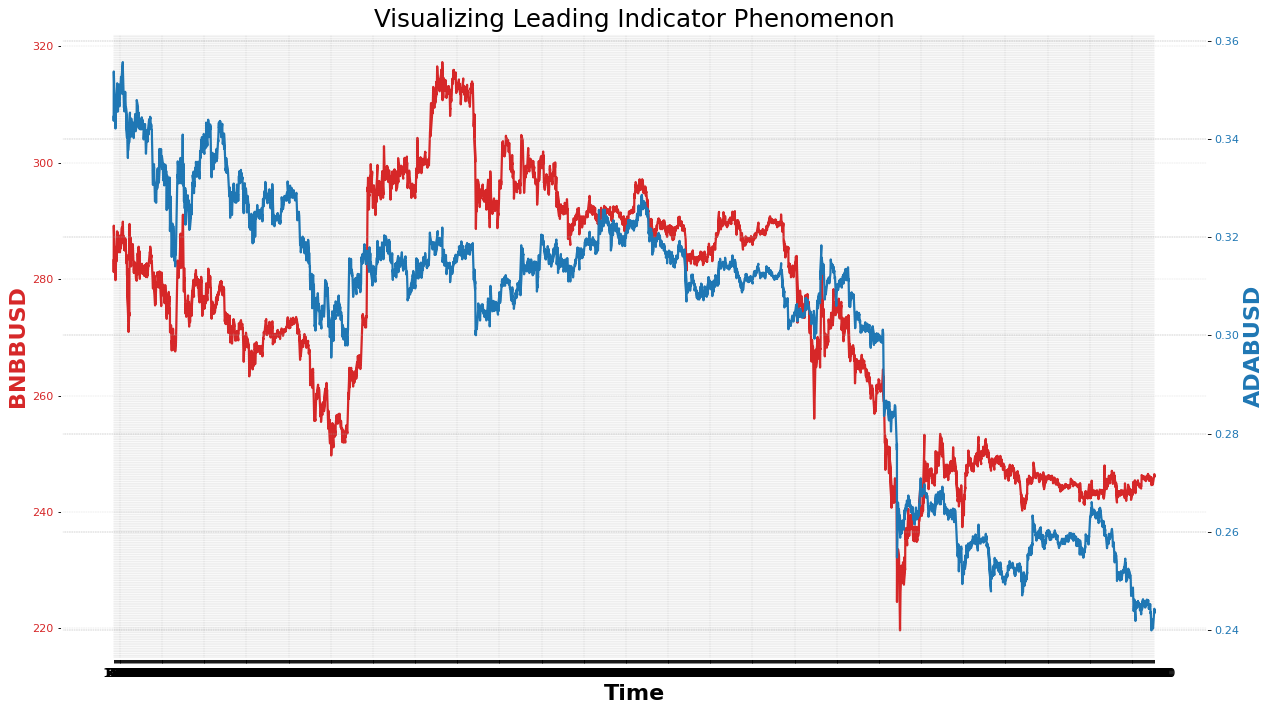

In [77]:
df_to_test = df[["BNBBUSD_avg_price", "ADABUSD_avg_price"]]
x = df.index
y1 = df_to_test["BNBBUSD_avg_price"]
y2 = df_to_test["ADABUSD_avg_price"]

# Plot Line1 (Left Y Axis)
fig, ax1 = plt.subplots(1,1,figsize=(16,9), dpi= 80)
ax1.plot(x, y1, color='tab:red')

# Plot Line2 (Right Y Axis)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(x, y2, color='tab:blue')

# Decorations
# ax1 (left Y axis)
ax1.set_xlabel('Time', fontsize=20)
ax1.tick_params(axis='x', rotation=0, labelsize=12)
ax1.set_ylabel('BNBBUSD', color='tab:red', fontsize=20)
ax1.tick_params(axis='y', rotation=0, labelcolor='tab:red' )
ax1.grid(alpha=.4)

# ax2 (right Y axis)
ax2.set_ylabel("ADABUSD", color='tab:blue', fontsize=20)
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_xticks(np.arange(0, len(x), 60))
ax2.set_xticklabels(x[::60], rotation=90, fontdict={'fontsize':10})
ax2.set_title("Visualizing Leading Indicator Phenomenon", fontsize=22)
fig.tight_layout()
plt.show()

We will use <b>granger causalitytests</b> for Granger Causality Test from "statsmodels" library

In [78]:
from statsmodels.tsa.stattools import grangercausalitytests

Now let's define custom function which will do Granger Causality Test and return result as <b>pd.DataFrame</b>

In [79]:
def grangers_causation_matrix(data, maxlag, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

In [80]:
grangers_causation_matrix(df_to_test, 1, variables=df_to_test.columns)

,BNBBUSD_avg_price_x,ADABUSD_avg_price_x
BNBBUSD_avg_price_y,1.000,0.9635
ADABUSD_avg_price_y,0.217,1.0000


How to interpret the p-values?

Assuming a significance level of 0.05, if the p-value is lesser than 0.05, then we do NOT reject the null hypothesis that X does NOT granger cause Y.

So, in the above table, the p-value for BNBBUSD_avg_price_x and ADABUSD_avg_price_y is 0.217. So we accept the null hypothesis and conclude that (BNBBUSD_avg_price) does not granger causes (ADABUSD_avg_price).

That means, BNBBUSD_avg_price will not be helpful in predicting the ADABUSD_avg_price.

The p-value for BNBBUSD_avg_price_y and ADABUSD_avg_price_x is 0. 

Since the p-value isn’t less than 0.05, we can’t reject the null hypothesis. That is, "BNBBUSD_avg_price_x" isn’t predictive of "ADABUSD_avg_price_y".

Let's calculate Granger Causality Test for all available pairs

In [81]:
currs = ["APEBUSD", "BTCBUSD", "ETHBUSD", "BNBBUSD", "XRPBUSD", "DOGEBUSD", "ADABUSD", "MATICBUSD"]
cols = [f"{curr}_x" for curr in currs]
idxs = [f"{curr}_y" for curr in currs]

gc_df = pd.DataFrame(columns=cols, index=idxs)

for (curr1, curr2) in itertools.combinations(currs, 2):
    df_to_test_2 = df[[f"{curr1}_avg_price", f"{curr2}_avg_price"]]
    res_df = grangers_causation_matrix(df_to_test_2, 1, variables=df_to_test_2.columns)
    p1 = res_df[f"{curr1}_avg_price_x"][f"{curr2}_avg_price_y"]
    p2 = res_df[f"{curr2}_avg_price_x"][f"{curr1}_avg_price_y"]
    gc_df.loc[f"{curr1}_y", f"{curr2}_x"] = p1
    gc_df.loc[f"{curr2}_y", f"{curr1}_x"] = p2
    
np.fill_diagonal(gc_df.values, "—")
    
gc_df

,APEBUSD_x,BTCBUSD_x,ETHBUSD_x,BNBBUSD_x,XRPBUSD_x,DOGEBUSD_x,ADABUSD_x,MATICBUSD_x
APEBUSD_y,—,0.0594,0.275,0.0447,0.6678,0.3891,0.6335,0.669
BTCBUSD_y,0.0453,—,0.0301,0.0023,0.008,0.0005,0.0211,0.0332
ETHBUSD_y,0.2582,0.0128,—,0.0083,0.1674,0.0245,0.2669,0.7044
BNBBUSD_y,0.1402,0.8655,0.2922,—,0.0309,0.006,0.217,0.1362
XRPBUSD_y,0.4646,0.3878,0.4397,0.5114,—,0.0941,0.5815,0.2083
DOGEBUSD_y,0.4152,0.1985,0.1051,0.3384,0.3273,—,0.4741,0.0269
ADABUSD_y,0.725,0.9248,0.8321,0.9635,0.2463,0.3136,—,0.1258
MATICBUSD_y,0.348,0.2262,0.2524,0.2793,0.9069,0.6597,0.7297,—


Above we can see a matrix that consists of all the p-values. How to interpret these values? We take any value, its column will be responsible for the dependent value (X), and the row - for the independent value (Y). If that value < 0.05 then that means X granger-causes Y

<p>We now have a better idea of what our data looks like and which variables are more related to our main currency <b>BNBBUSD</b></p>

The most related currencies:

<ul>
    <li>ADABUSD</li>
    <li>XRPBUSD</li>
    <li>DOGEBUSD</li>
</ul>

<p>As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.</p>


### Thank you for completing this lab!

## Author

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Joseph Santarcangelo</a>

### Other Contributors

<a href="https://www.linkedin.com/in/mahdi-noorian-58219234/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Mahdi Noorian PhD</a>

Bahare Talayian

Eric Xiao

Steven Dong

Parizad

Hima Vasudevan

<a href="https://www.linkedin.com/in/fiorellawever/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Fiorella Wenver</a>

<a href="https:// https://www.linkedin.com/in/yi-leng-yao-84451275/ " target="_blank" >Yi Yao</a>.

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description                 |
| ----------------- | ------- | ---------- | ---------------------------------- |
| 2020-10-30        | 2.1     | Lakshmi    | changed URL of csv                 |
| 2020-08-27        | 2.0     | Lavanya    | Moved lab to course repo in GitLab |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
